# Dataset Analysis and Visualization

This notebook provides exploratory analysis and visualization of our datasets

Key Components:
1. Visualization of synthetic datasets:
   - 3D representations and 2D projections of Zigzag, Bonhomme, Helicoids, and Swiss Roll
   - Multiple viewing angles to understand data structure

2. Real-world dataset analysis:
   - Feature correlation analysis
   - Distribution of categorical variables
   - Basic statistical insights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import config
import data_utils
import plot
import reduction_methods
import pandas as pd
import seaborn as sns

importlib.reload(config)
importlib.reload(data_utils)
importlib.reload(plot)
importlib.reload(reduction_methods)

from data_utils import load_datasets, DatasetManager, get_categorical_features, get_numerical_features, load_real_dataset
from plot import plot_3d_and_2d_projection, plot_dimensionality_reduction_results


c:\Users\levovo pro p50\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Synthetic data

In [2]:
dataset_name = 'sample_data.pkl'  # Using pickle for serialization
save_path = config.DATA_DIR

manager = DatasetManager(dataset_name, save_path, load_datasets)
datasets = manager.load_dataset()


Loading sample_data.pkl from local storage.


In [3]:
# count the number of data in each dataset
for name, (data, labels) in datasets.items():
    print(f"{name}: {len(data)}")



Helicoids: 1000
Zigzag: 830
Swiss Roll: 1000
Bonhomme: 1163


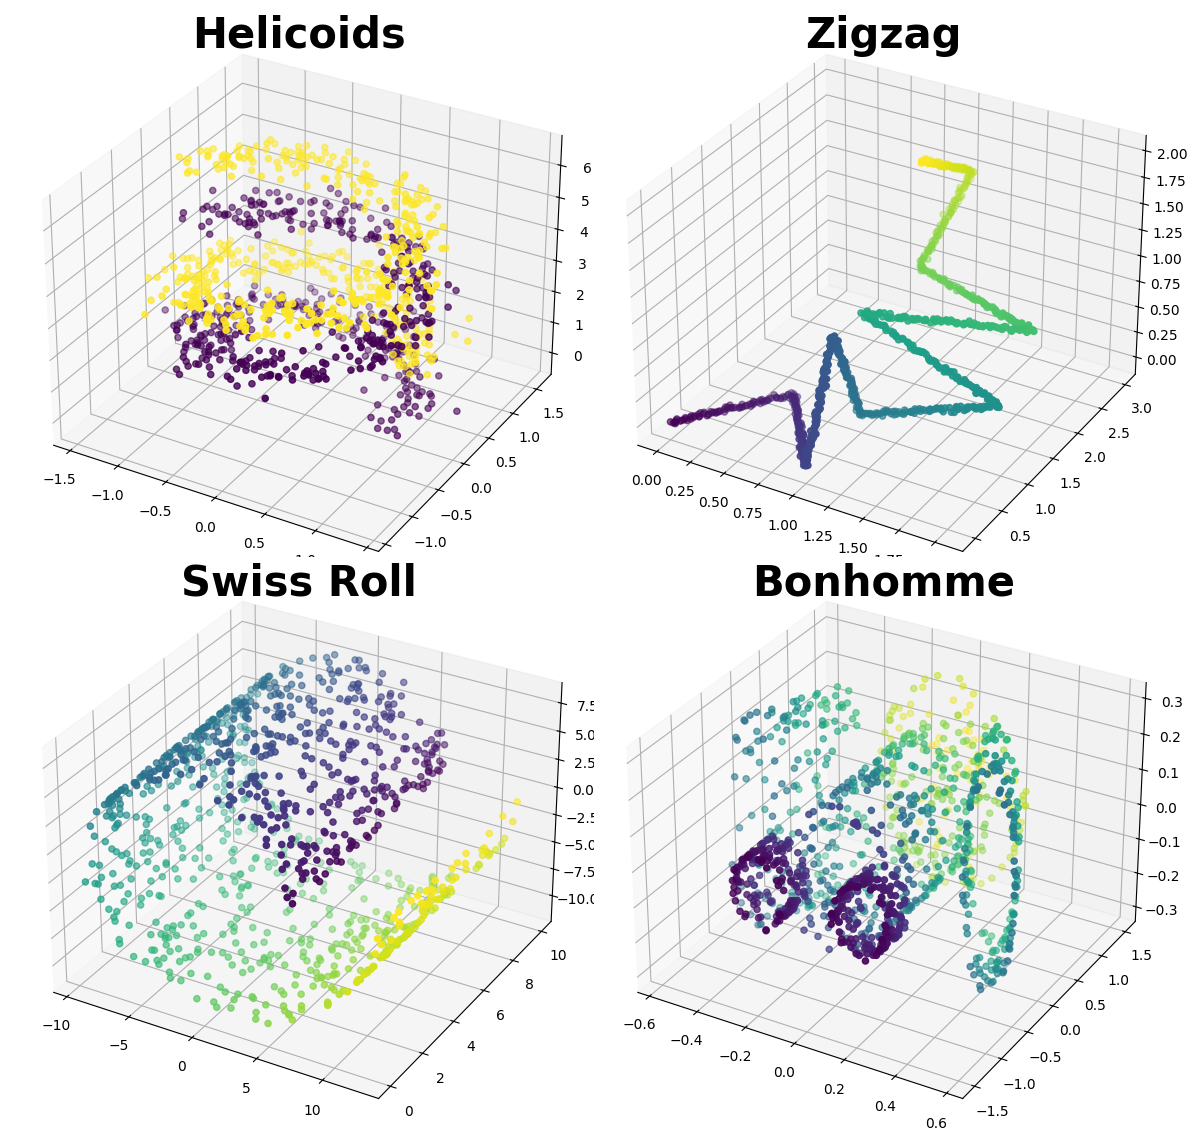

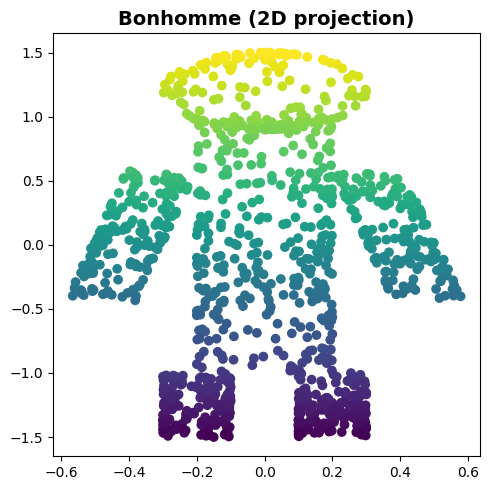

In [14]:
# Plot the 4 datasets on the same plot
# Create a figure with 4 subplots arranged in a 2x2 grid
fig = plt.figure(figsize=(15, 15))

# Plot first 3 datasets in 3D
for idx, (name, (data, labels)) in enumerate(list(datasets.items()), 1):
    ax = fig.add_subplot(2, 2, idx, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.set_title(name, y=1, fontsize=30, fontweight='bold')  

plt.subplots_adjust(wspace=0.01, hspace=-0.1)
# Plot du dernier dataset en 3D et en projection 2D avec des proportions ajustées
name, (data, labels) = list(datasets.items())[3]
fig = plt.figure(figsize=(5, 5))
ax_2d = fig.add_subplot(1, 1, 1)
scatter_2d = ax_2d.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
ax_2d.set_title(f"{name} (2D projection)", y=1, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

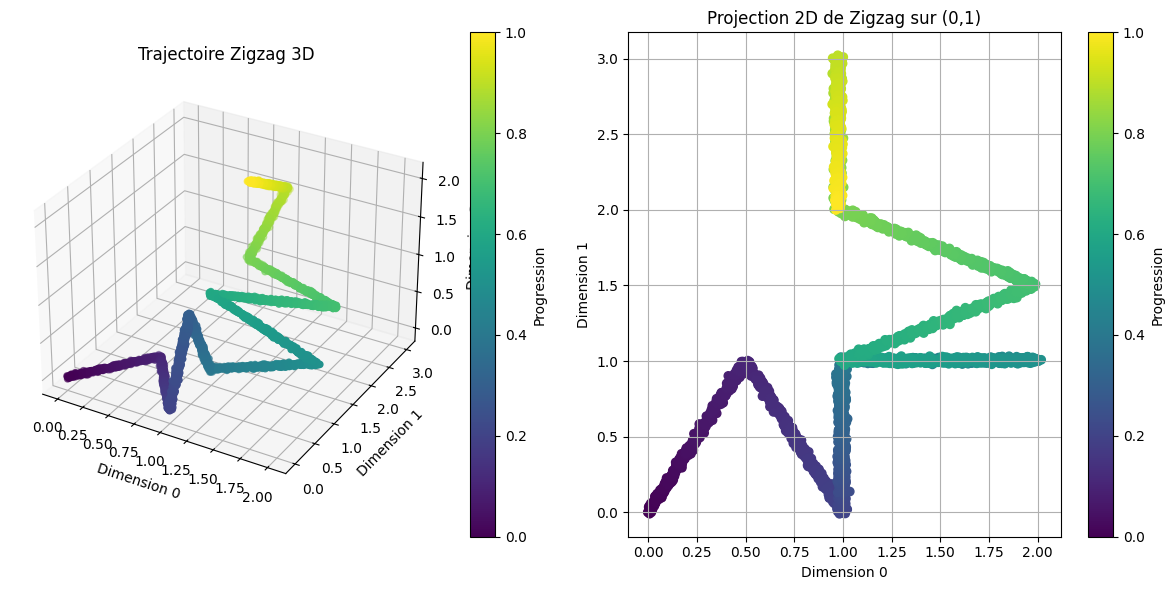

In [8]:
zigzag_dataset, zigzag_labels = datasets['Zigzag']

# Utilisation de la fonction pour le dataset Zigzag
plot_3d_and_2d_projection(zigzag_dataset, zigzag_labels, "Zigzag")


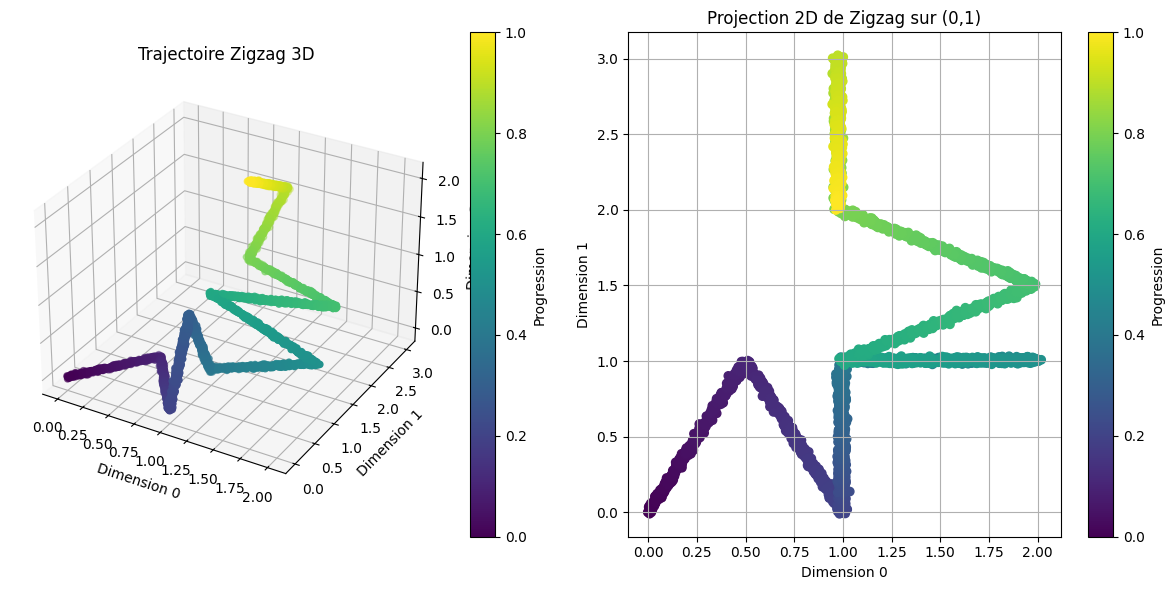

In [10]:

zigzag_dataset, zigzag_labels = datasets['Zigzag']

# Utilisation de la fonction pour le dataset Zigzag
plot_3d_and_2d_projection(zigzag_dataset, zigzag_labels, "Zigzag")


In [11]:
plot_dimensionality_reduction_results(zigzag_dataset, zigzag_labels, n_neighbors_dict={"LLE": 12, "Isomap": 12})


KeyboardInterrupt: 

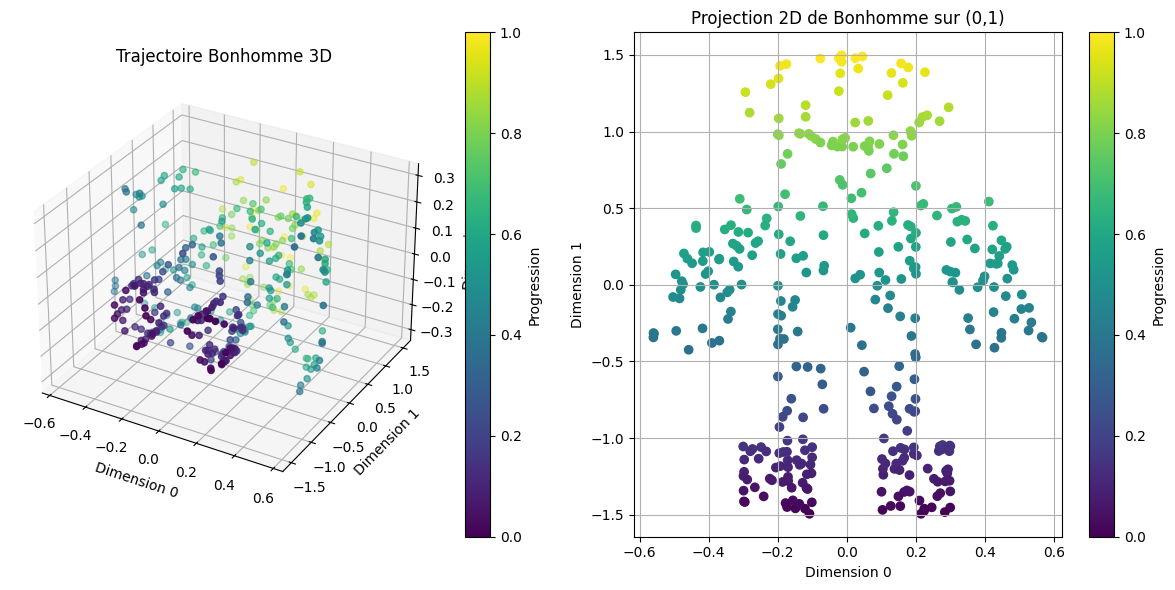

In [461]:
bonhomme_dataset, bonhomme_labels = datasets['Bonhomme']

plot_3d_and_2d_projection(bonhomme_dataset, bonhomme_labels, "Bonhomme")

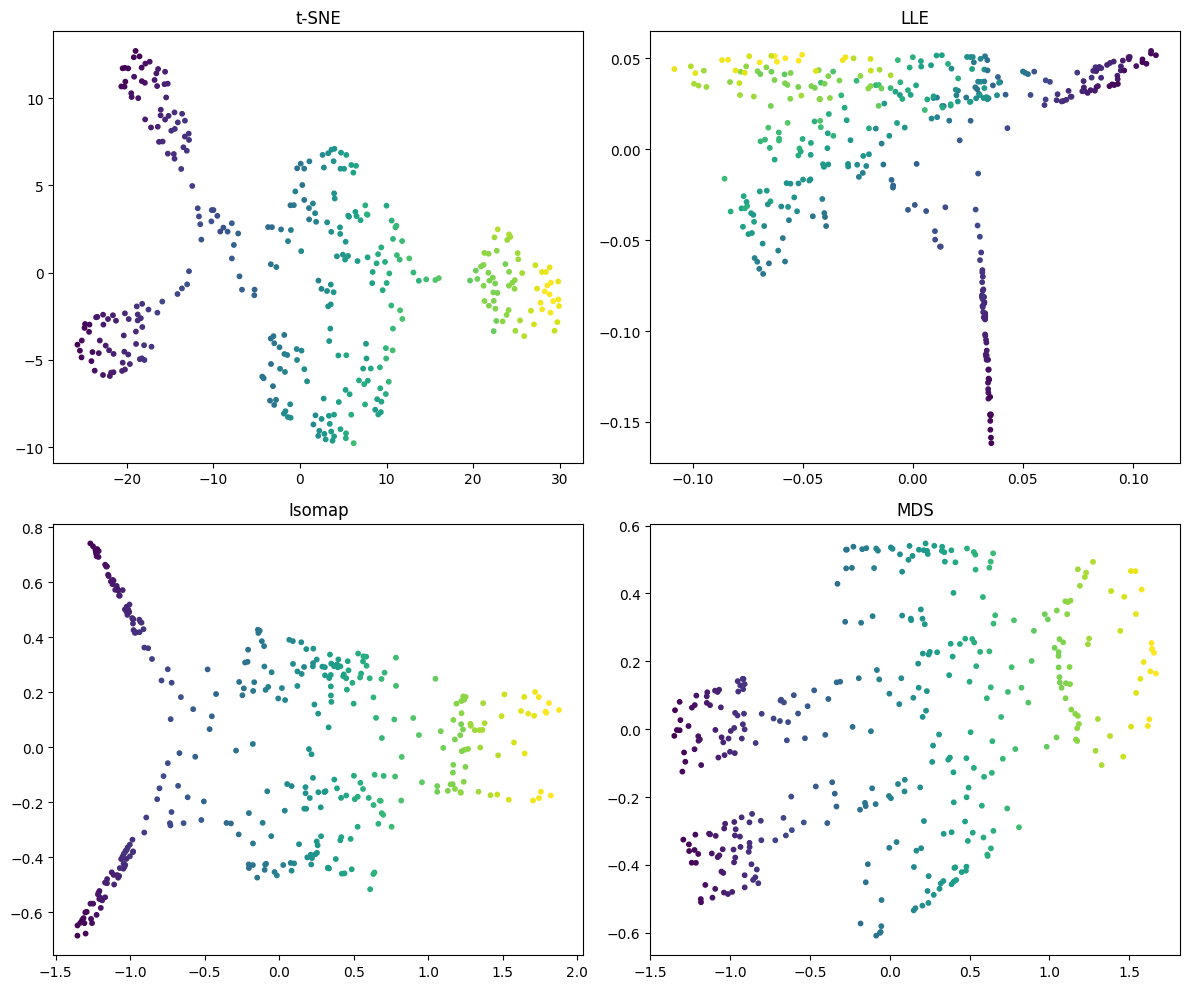

In [462]:
plot_dimensionality_reduction_results(bonhomme_dataset, bonhomme_labels)


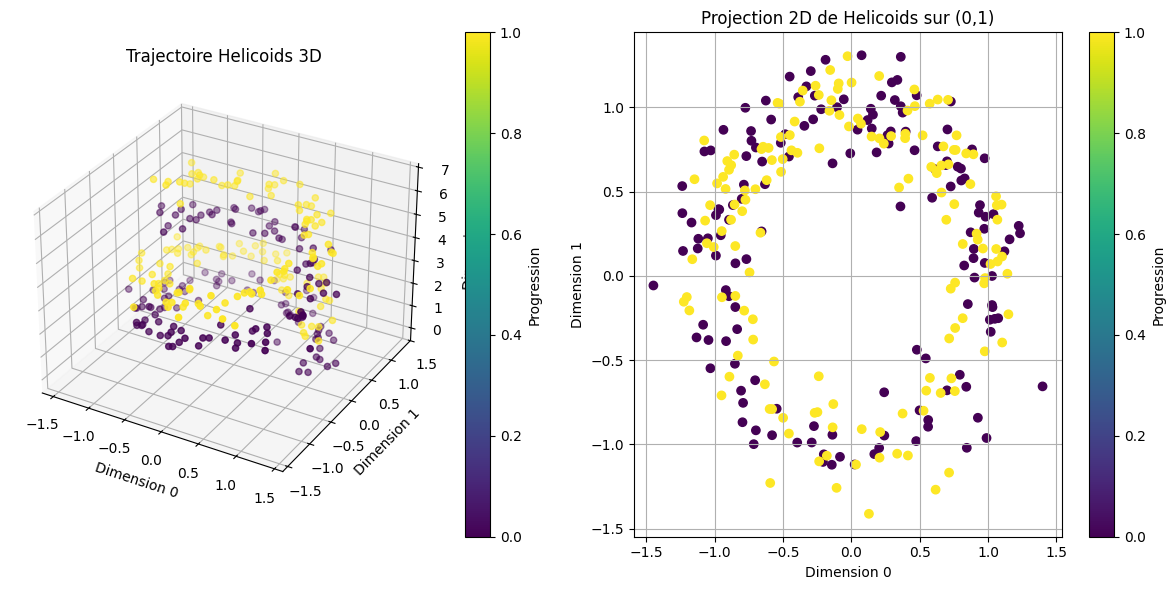

In [463]:
# Générer les hélicoïdes
helicoids_dataset, helicoids_labels = datasets['Helicoids']

# Visualisation 3D et projection 2D
plot_3d_and_2d_projection(helicoids_dataset, helicoids_labels, "Helicoids")


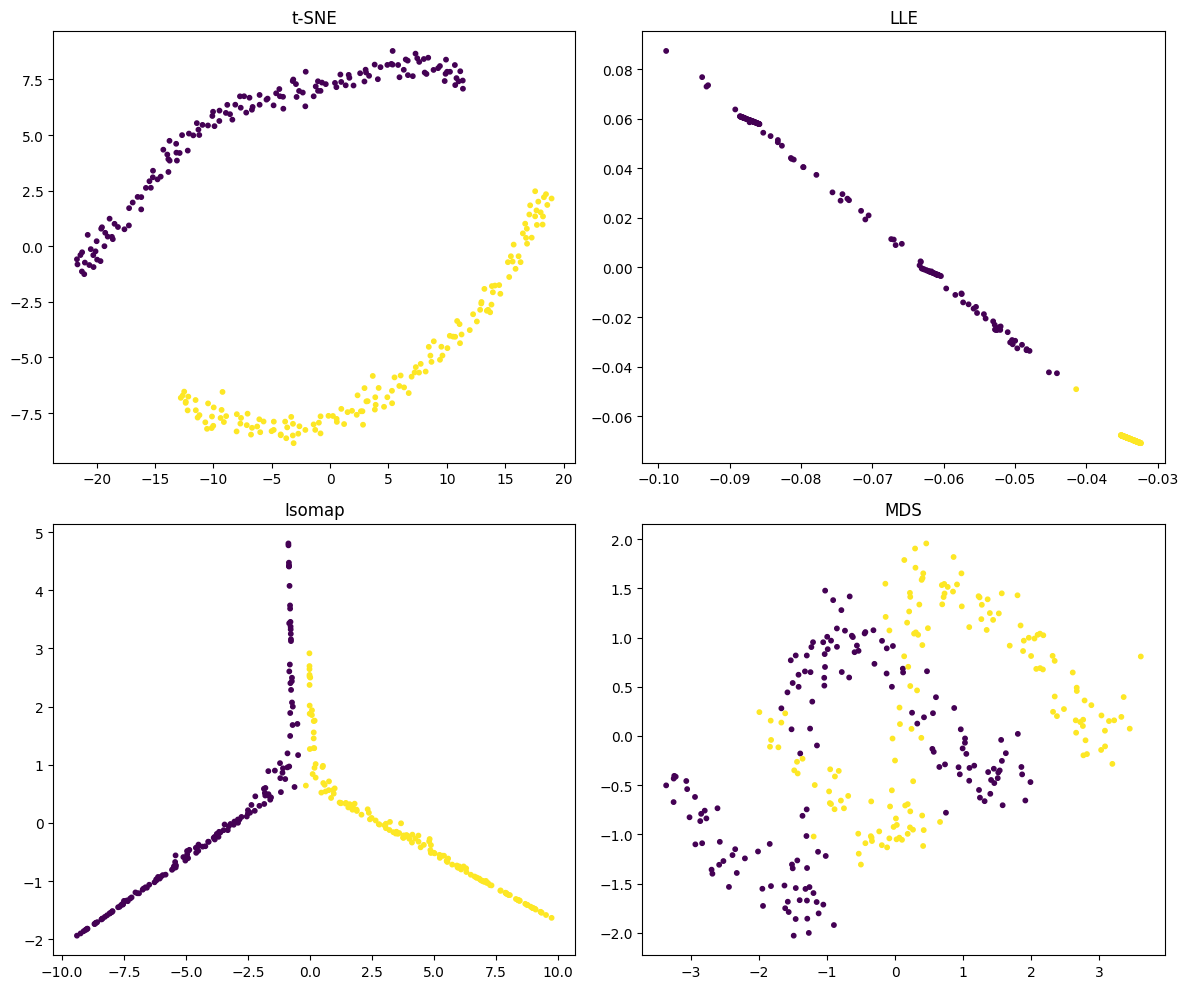

In [481]:
plot_dimensionality_reduction_results(helicoids_dataset, helicoids_labels, n_neighbors_dict={"LLE": 6, "Isomap": 7})


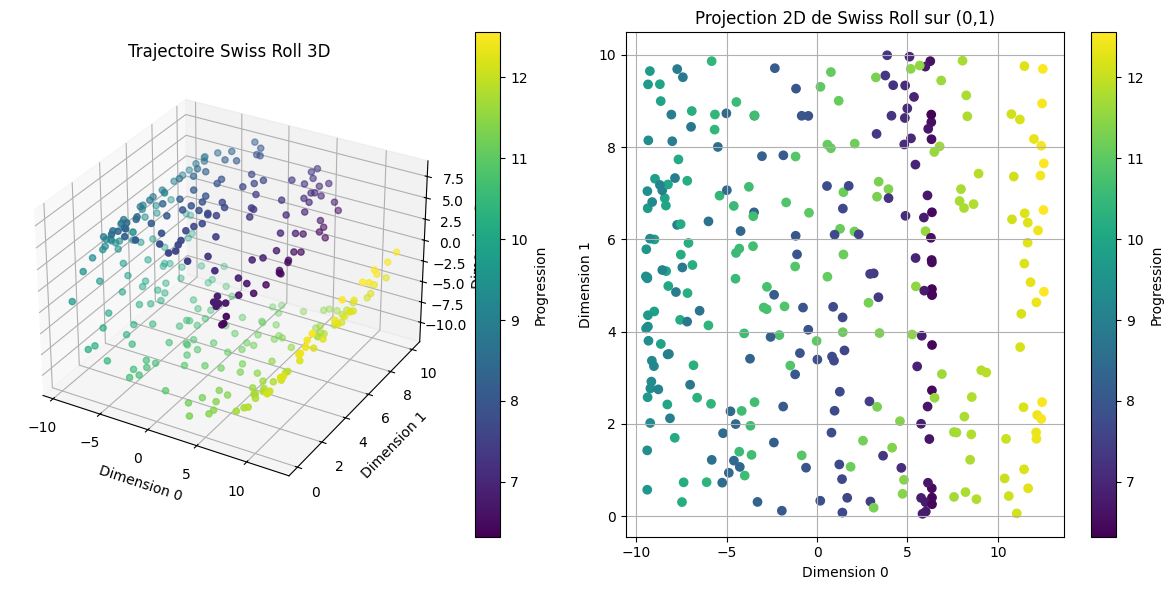

In [465]:

swiss_roll_dataset, swiss_roll_labels = datasets['Swiss Roll']

plot_3d_and_2d_projection(swiss_roll_dataset, swiss_roll_labels, "Swiss Roll")


# Real-data

In [3]:
real_data_csv = f"{config.DATA_DIR}/data_real_data.csv"
df = pd.read_csv(real_data_csv, sep='\t')

             Feature  Correlation with Genre
0   track_popularity               -0.070780
1       danceability               -0.268109
2             energy                0.000697
3                key               -0.010922
4           loudness               -0.168734
5               mode                0.039799
6        speechiness                0.054634
7       acousticness               -0.073634
8   instrumentalness                0.036434
9           liveness                0.049346
10           valence               -0.076474
11             tempo                0.062986
12       duration_ms                0.132910


C:\Users\levovo pro p50\AppData\Local\Temp\ipykernel_104976\3768037575.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


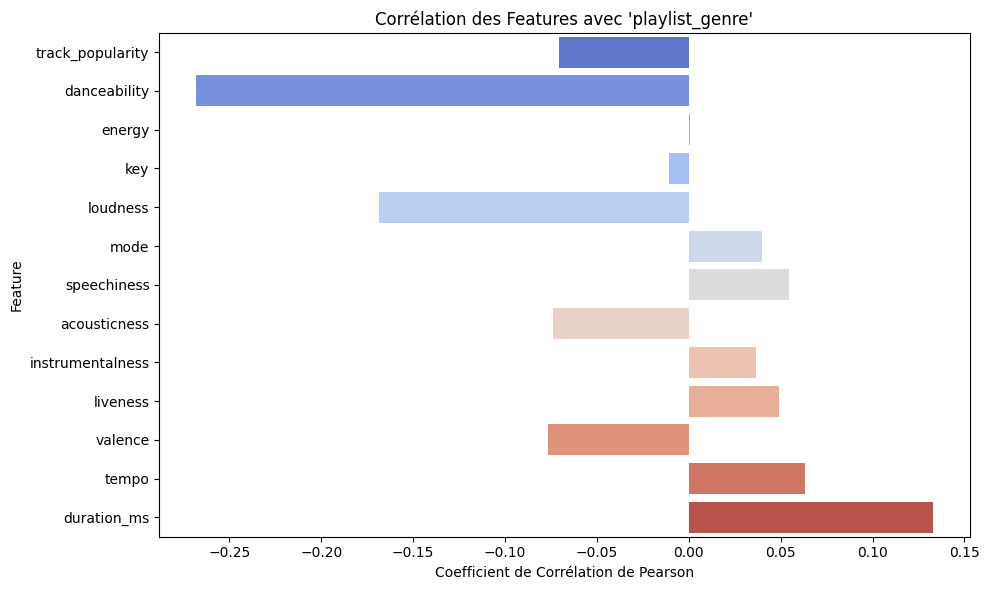


Nombre d'éléments uniques par feature catégorielle :
                    Feature  Unique Values
0                track_name           4876
1          track_album_name           4463
2  track_album_release_date           1909
3             playlist_name            367
4               playlist_id            389
5         playlist_subgenre             20
Number of unique labels:
playlist_genre
rap      1149
pop      1101
r&b      1086
latin    1031
rock      990
Name: count, dtype: int64
['rock' 'r&b' 'pop' 'rap' 'latin']


In [22]:
# Obtenir les features numériques et catégorielles
categorical_features = get_categorical_features(df)
numerical_features = get_numerical_features(df)

# Tableau avec le nombre d'éléments uniques par feature catégorielle
unique_counts = categorical_features.nunique()
unique_counts_df = unique_counts.to_frame(name='Unique Values').reset_index()
unique_counts_df.rename(columns={'index': 'Feature'}, inplace=True)

# Tableau avec les labels uniques
unique_labels = df['playlist_genre'].unique()
unique_labels_df = pd.DataFrame({'Unique Labels': unique_labels})
unique_labels_counts = df['playlist_genre'].value_counts()
# Définir la variable cible
y = df['playlist_genre'].astype('category').cat.codes

# Calculer les corrélations entre les features numériques et la variable cible
correlation_list = []
for col in numerical_features.columns:
    corr = numerical_features[col].corr(y, method='pearson')
    correlation_list.append({'Feature': col, 'Correlation with Genre': corr})

# Créer un DataFrame combiné
correlation_combined_df = pd.DataFrame(correlation_list)
print(correlation_combined_df)

# Visualiser les corrélations combinées
plt.figure(figsize=(10, max(6, len(correlation_combined_df) * 0.4)))  # Ajuster la taille en fonction du nombre de features
sns.barplot(
    x='Correlation with Genre',
    y='Feature',
    data=correlation_combined_df,
    palette='coolwarm',
    orient='h'
)
plt.title("Corrélation des Features avec 'playlist_genre'")
plt.xlabel("Coefficient de Corrélation de Pearson")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Optionnel : Visualiser le tableau unique des counts
print("\nNombre d'éléments uniques par feature catégorielle :")
print(unique_counts_df)
print('Number of unique labels:')
print(unique_labels_counts)


In [ ]:
# preprocess and save data
dataset_name = 'data_real_data.pkl'

save_path = config.DATA_DIR

manager = DatasetManager(dataset_name, save_path, load_real_dataset)
datasets = manager.load_dataset()


data_real_data.pkl not found locally. Loading using load_datasets...
Loaded and saved to data/data_real_data.pkl.


(5357, 397)